# StackOverflow Data - Ploting the Number of Python Questions

In this example, we are going to plot the number of questions with python tag that got asked through time. 

The data used for this example can be found on: https://www.kaggle.com/stackoverflow/stacksample

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
%matplotlib inline

First we are going to import the tag file, which we will later use for filtering. We will parse the content of it and put it in the dictionary.

In [2]:
with open("StackOverflow/Tags.csv", "r") as read:
    lines = read.readlines()

In [3]:
questions_with_tags = defaultdict(set)

In [4]:
for line in lines[1:]:
    question, tag = line.strip().split(",")
    questions_with_tags[tag].add(question)

Now we are going to read the files with questions and answers, only saving the items that had the python tag.

In [5]:
python_questions = defaultdict(list)

In [6]:
with open("StackOverflow/Questions.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[0] in questions_with_tags["python"]:
            python_questions[line[0]].append(line[2])
            python_questions[line[0]].append(0)
            python_questions[line[0]].append(line[6])

In [7]:
with open("StackOverflow/Answers.csv", "r", -1, "latin-1") as read:
    reader = csv.reader(read, delimiter=',', quotechar='"')
    for line in reader:
        if line[3] in python_questions:
            python_questions[line[3]][1] += 1

In the next part, we are going to check on which dates the questions with python tags were actually asked and how many of them were asked. 

In [8]:
all_dates = defaultdict(int)

In [9]:
for element in python_questions.values():
    if len(element) == 3:
        all_dates[element[0][:10]] += 1

Next we are going to put all this data in the data frame. 

In [10]:
data = pd.DataFrame.from_dict(all_dates, orient='index')

In [11]:
data.index = pd.to_datetime(data.index)

And now we can plot it. While we can see that there is a lot of variation, it seems that the number of questions is slowly increasing. Is this because the language is more popular, or because the site is more popular?

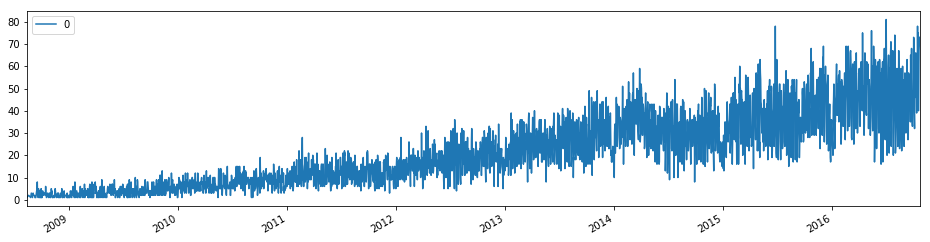

In [12]:
data.plot(figsize=(16,4))